# Tarea 16 Adán Rubiol

__Ejercicio 1__: ¿Cómo podemos evaluar funciones en matrices?

La operacion bien definida en matrices son la composición 

Así si tenemos una función  $F(x)$ y la evaluamos en A

Tomamos su expansión de Taylor;


$$F(A)= \sum_{n=0}^{\infty} \frac{F^{(n)}(0)}{n!}A^{n}$$ 

con  $$A^{n}=A\circ A\circ  A \circ A..  n-veces$$, es decir la multiplicar la matriz n veces así;

$$e^{A} =  \sum_{n=0}^{\infty} \frac{A^{n}}{n!}$$

__Ejercicio 2:__ ¿Como se define una matriz simétrica?

Se define una matriz A simétrica si A es igual a su transpuesta
$A=A^{T}$ así para cualquier elemento se verifica $a_{ij}=a_{ji}$

__Ejercicio 3:__ ¿Como puede construir una matriz simétrica a partir de cualquier matriz cuadrada?

Dada cualquier matriz cuadrada podemos tomar los elementos que estan  de la diagional hacia arriba, es decir los $a_{ij}$, con $j\geq i$, y reflejarlos en la digonal de abajo de tal manera que $a_{ij}$=$a_{ji}$
También podemos hacer lo mismo con los elementos que estan de la diagonal hacia abajo.  es decir con $i \geq j$

__Ejercicio 4:__ Construya el propagador $e^{A t}$ para cada tiempo sobre una malla y uselo para propagar un estado inicial $\vec x_0$ cualquiera. Utilice:
$$A=\left(\begin{array}{cc} 1 & 1\\ -1 & 1 \end{array} \right).$$
* Grafique la trayectoria en el espacio de fase.

In [46]:
A=[1 1; -1 1]#se define la matriz A

2×2 Array{Int64,2}:
  1  1
 -1  1

In [47]:
expm(A)

2×2 Array{Float64,2}:
  1.46869  2.28736
 -2.28736  1.46869

In [48]:
f(x,t)=(expm(A))*[x[1],x[2]]#tomamos la función de evolución para exp(A)

f (generic function with 1 method)

In [49]:
function euler(f,list,x0)
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t = i*h
        x = x + f(x,t)*h
        push!(listx,x) 
     end
     return listx
end

euler (generic function with 1 method)

In [50]:
list=0:0.01:20;
vec=euler(f,list,[2,3]);#por el método de euler resolvemos el sistema

In [51]:
listx1=map(x->x[1],vec);
listx2=map(x->x[2],vec);

In [52]:
using PyPlot

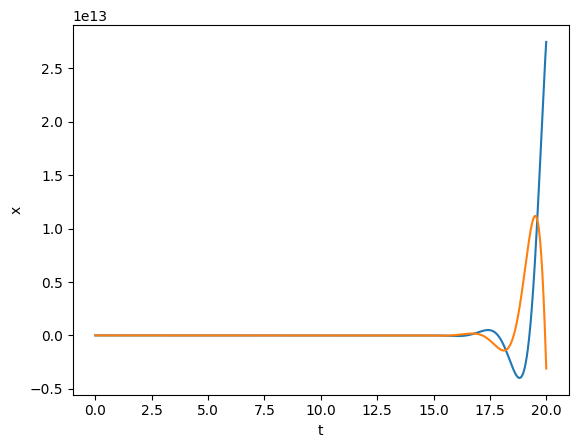

PyObject <matplotlib.text.Text object at 0x7f0768e4bad0>

In [56]:
plot(list,listx1)
plot(list,listx2);
xlabel("t");ylabel("x")
# Ahora se grafica x vs t 

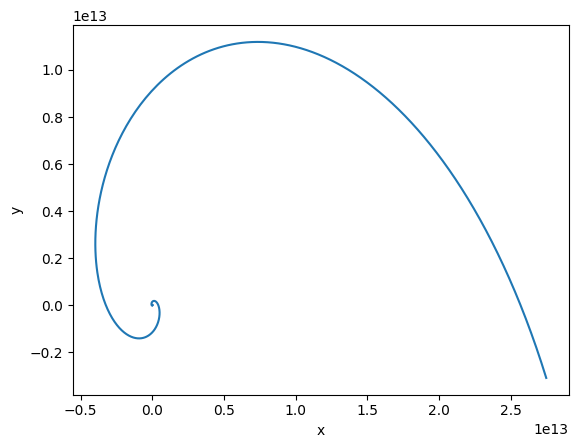

PyObject <matplotlib.text.Text object at 0x7f0768cfcf50>

In [58]:
plot(listx1,listx2)
xlabel("x");ylabel("y")
#se grafica X vs Y